In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df=df.drop(['area_type','availability','balcony'],axis='columns')
df

,location,size,society,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,231.00
13316,Richards Town,4 BHK,NaN,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,488.00


In [5]:
df.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
price            0
dtype: int64

In [6]:
df2=df.dropna()
df2.isnull().sum()

location      0
size          0
society       0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '3 Bedroom', '1 RK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '6 Bedroom',
       '2 Bedroom', '9 Bedroom', '6 BHK', '7 BHK', '10 Bedroom',
       '8 Bedroom', '18 Bedroom'], dtype=object)

In [8]:
df2['size_bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]) )
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8908\3986726891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size_bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]) )


,location,size,society,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,95.00,3
5,Whitefield,2 BHK,DuenaTa,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,Jaades,2732,4.0,204.00,4


In [9]:
df2=df2.drop('size',axis='columns')
df2.head()

,location,society,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,Coomee,1056,2.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600,5.0,120.00,4
3,Lingadheeranahalli,Soiewre,1521,3.0,95.00,3
5,Whitefield,DuenaTa,1170,2.0,38.00,2
6,Old Airport Road,Jaades,2732,4.0,204.00,4


In [10]:
df2.size_bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7, 10,  8, 18], dtype=int64)

In [11]:
df2.total_sqft.loc[400:1000].value_counts()

1200           8
1150           6
1500           5
1185           5
1075           4
              ..
2378           1
3385           1
1641           1
1120 - 1145    1
2112.95        1
Name: total_sqft, Length: 251, dtype: int64

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df2[~df2.total_sqft.apply(is_float)]

,location,society,total_sqft,bath,price,size_bhk
30,Yelahanka,LedorSa,2100 - 2850,4.0,186.000,4
122,Hebbal,SNontle,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,54.005,2
165,Sarjapur,Kinuerg,1145 - 1340,2.0,43.490,2
188,KR Puram,MCvarar,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,Bhath N,850 - 1060,2.0,38.190,2
12990,Talaghattapura,Sodgere,1804 - 2273,3.0,122.000,3
13059,Harlur,Shodsir,1200 - 1470,2.0,72.760,2
13265,Hoodi,Ranuetz,1133 - 1384,2.0,59.135,2


In [13]:
def convt_range(x):
    range=x.split('-')
    if len(range)==2:
        return (float(range[0])+float(range[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
convt_range('2100 - 2850')

2475.0

In [15]:
df2['total_sqft']=df2.total_sqft.apply(convt_range)


In [16]:
df2.loc[13059]


location       Harlur
society       Shodsir
total_sqft     1335.0
bath              2.0
price           72.76
size_bhk            2
Name: 13059, dtype: object

In [17]:
df2

,location,society,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,Coomee,1056.0,2.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600.0,5.0,120.00,4
3,Lingadheeranahalli,Soiewre,1521.0,3.0,95.00,3
5,Whitefield,DuenaTa,1170.0,2.0,38.00,2
6,Old Airport Road,Jaades,2732.0,4.0,204.00,4
...,...,...,...,...,...,...
13313,Uttarahalli,Aklia R,1345.0,2.0,57.00,3
13314,Green Glen Layout,SoosePr,1715.0,3.0,112.00,3
13315,Whitefield,ArsiaEx,3453.0,4.0,231.00,5
13317,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,60.00,2


In [18]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,society,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,Coomee,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,Theanmp,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,Soiewre,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,DuenaTa,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,Jaades,2732.0,4.0,204.00,4,7467.057101


In [19]:
len(df3.location.unique())

647

In [20]:
df3.location=df3.location.apply(lambda x: x.strip())
df3_loc=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
df3_loc

location
Whitefield         414
Sarjapur  Road     329
Electronic City    238
Kanakpura Road     220
Thanisandra        216
                  ... 
Raghuvanahalli       1
Rahat Bagh           1
Rahmath Nagar        1
Hongasandra          1
1 Giri Nagar         1
Name: location, Length: 639, dtype: int64

In [21]:
other=(df3_loc[df3_loc<=10])
other

location
BTM Layout        10
Murugeshpalya     10
Arekere           10
Rayasandra        10
HBR Layout        10
                  ..
Raghuvanahalli     1
Rahat Bagh         1
Rahmath Nagar      1
Hongasandra        1
1 Giri Nagar       1
Name: location, Length: 491, dtype: int64

In [22]:
df3.location=df3.location.apply(lambda x:'other' if x in other else x)
len(df3.location.unique())

149

In [23]:
df3

,location,society,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,Coomee,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,Theanmp,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,Soiewre,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,DuenaTa,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,Jaades,2732.0,4.0,204.00,4,7467.057101
...,...,...,...,...,...,...,...
13313,Uttarahalli,Aklia R,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,SoosePr,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,ArsiaEx,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,60.00,2,5258.545136


In [24]:
df4=df3.drop(['society'],axis='columns')

In [25]:
df4.shape

(7747, 6)

In [26]:
df4[(df4.total_sqft/df4.size_bhk<300)]

,location,total_sqft,bath,price,size_bhk,price_per_sqft
349,other,11.0,3.0,74.00,3,672727.272727
480,other,1150.0,4.0,260.00,4,22608.695652
483,other,1200.0,5.0,190.00,5,15833.333333
783,other,900.0,7.0,76.00,6,8444.444444
1239,Electronic City,550.0,1.0,16.00,2,2909.090909
2040,Electronic City,550.0,1.0,15.00,2,2727.272727
2126,Electronic City Phase II,545.0,1.0,27.00,2,4954.128440
2486,Bhoganhalli,296.0,1.0,22.89,1,7733.108108
2796,Electronic City,880.0,2.0,18.00,3,2045.454545
3097,other,1200.0,5.0,195.00,5,16250.000000


In [27]:
df5=df4[~(df4.total_sqft/df4.size_bhk<300)]
df5.shape

(7701, 6)

In [28]:
def outlier(df):
    df_new=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_per_sqft)
        s=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(m-s))& (sub_df.price_per_sqft<(m+s))]
        df_new=pd.concat([reduced_df,df_new],ignore_index=True)
    return df_new

In [29]:
df6=outlier(df5)
df6.shape

(6032, 6)

In [30]:
df6.location.unique()

array(['other', 'Yeshwanthpur', 'Yelahanka New Town', 'Yelahanka',
       'Whitefield', 'Vittasandra', 'Vijayanagar', 'Varthur',
       'Uttarahalli', 'Tumkur Road', 'Thubarahalli', 'Thigalarapalya',
       'Thanisandra', 'Talaghattapura', 'Subramanyapura', 'Sonnenahalli',
       'Somasundara Palya', 'Seegehalli', 'Sector 2 HSR Layout',
       'Sarjapur  Road', 'Sarjapur', 'Sahakara Nagar', 'Ramamurthy Nagar',
       'Ramagondanahalli', 'Rajiv Nagar', 'Rajaji Nagar',
       'Raja Rajeshwari Nagar', 'Rachenahalli', 'Prithvi Layout',
       'Pattandur Agrahara', 'Parappana Agrahara', 'Panathur',
       'Padmanabhanagar', 'Old Madras Road', 'Old Airport Road',
       'Nehru Nagar', 'Neeladri Nagar', 'Nagavarapalya', 'Nagarbhavi',
       'Mysore Road', 'Munnekollal', 'Marsur', 'Marathahalli',
       'Malleshwaram', 'Mallasandra', 'Mahadevpura', 'Magadi Road',
       'Lingadheeranahalli', 'Lakshminarayana Pura', 'Kundalahalli',
       'Kudlu Gate', 'Kudlu', 'Kothanur', 'Koramangala', 'Kodih

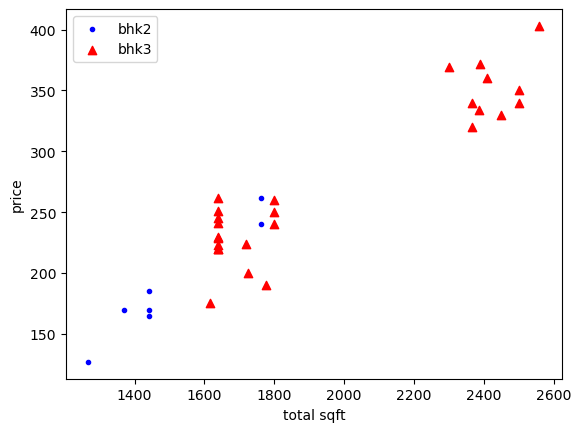

In [31]:
def plt_scatter(df,location):
    bhk2=df[(df.location==location) & (df.size_bhk==2)]
    bhk3=df[(df.location==location) & (df.size_bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='.',color='blue')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='^',color='red')
    plt.xlabel('total sqft')
    plt.ylabel('price')
    plt.legend(['bhk2','bhk3'])
    
plt_scatter(df6,'Rajaji Nagar')

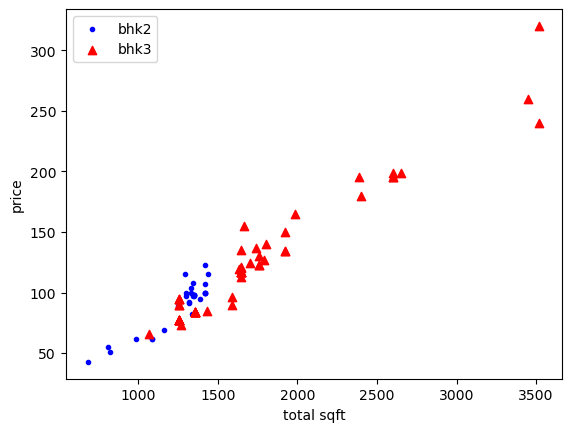

In [32]:
plt_scatter(df6,'Hebbal')

In [33]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for size_bhk,bhk_df in location_df.groupby('size_bhk'):
            bhk_stats[size_bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
    
    for size_bhk,bhk_df in location_df.groupby('size_bhk'):
        stats=bhk_stats.get(size_bhk-1)
        if stats and stats['count']>5:
            exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(5432, 6)

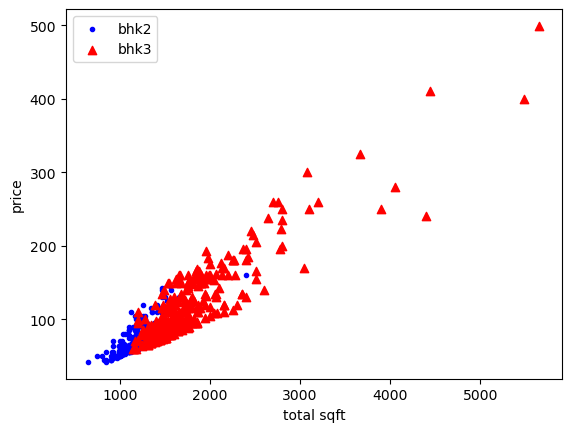

In [34]:
plt_scatter(df7,'other')

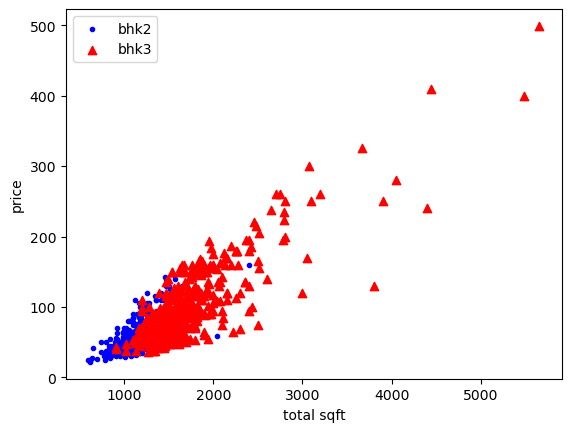

In [35]:
plt_scatter(df6,'other')

(array([ 379., 1353., 2074., 1150.,  308.,   78.,   33.,   23.,   23.,
          11.]),
 array([ 2090.90909091,  3486.16600791,  4881.4229249 ,  6276.6798419 ,
         7671.93675889,  9067.19367589, 10462.45059289, 11857.70750988,
        13252.96442688, 14648.22134387, 16043.47826087]),
 <BarContainer object of 10 artists>)

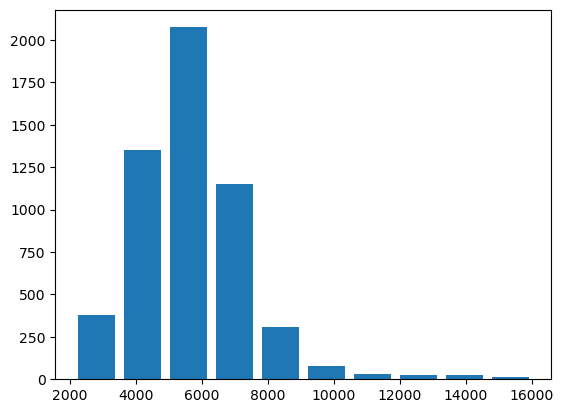

In [36]:
plt.hist(df7.price_per_sqft,rwidth=0.8)

In [37]:
df7.bath.unique()

array([3., 2., 1., 4., 9., 5., 6., 7.])

In [38]:
df7[df7.bath>6]

,location,total_sqft,bath,price,size_bhk,price_per_sqft
52,other,5000.0,9.0,360.0,11,7200.000000
61,other,5000.0,9.0,210.0,9,4200.000000
268,other,11338.0,9.0,1000.0,6,8819.897689
2384,Sarjapur Road,3905.0,7.0,290.0,5,7426.376440
2402,Sarjapur Road,3930.0,7.0,329.0,5,8371.501272
2918,Old Madras Road,4500.0,7.0,294.0,5,6533.333333
2937,Old Madras Road,5020.0,7.0,287.0,5,5717.131474


In [39]:
df8=df7[~(df7.bath>=df7.size_bhk+2)]
df8

,location,total_sqft,bath,price,size_bhk,price_per_sqft
0,other,1925.0,3.0,125.0,3,6493.506494
1,other,1296.0,2.0,81.0,2,6250.000000
2,other,600.0,1.0,38.0,1,6333.333333
4,other,845.0,2.0,55.0,2,6508.875740
5,other,2511.0,3.0,205.0,3,8164.078057
...,...,...,...,...,...,...
6027,1st Phase JP Nagar,1590.0,3.0,131.0,3,8238.993711
6028,1st Phase JP Nagar,2180.0,3.0,210.0,3,9633.027523
6029,1st Phase JP Nagar,2077.0,3.0,175.0,3,8425.613866
6030,1st Phase JP Nagar,1205.0,2.0,85.0,2,7053.941909


In [40]:
df9=df8.drop('price_per_sqft',axis='columns')

In [41]:
df10=pd.get_dummies(df9.location)
df10.head()

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df11=pd.concat([df9,df10.drop('other',axis='columns')],axis='columns')
df12=df11.drop('location',axis='columns')
df12

,total_sqft,bath,price,size_bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1925.0,3.0,125.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1296.0,2.0,81.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600.0,1.0,38.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,845.0,2.0,55.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2511.0,3.0,205.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,1590.0,3.0,131.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6028,2180.0,3.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6029,2077.0,3.0,175.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6030,1205.0,2.0,85.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X=df12.drop('price',axis='columns')
Y=df12['price']
X

,total_sqft,bath,size_bhk,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1925.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1296.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,845.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2511.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6028,2180.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6029,2077.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6030,1205.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9129577244502568

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(lr,X,Y,cv=cv)

array([0.89034412, 0.91147506, 0.90019033, 0.91818675, 0.90448916])

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def model_params(X,Y):
    algos={
        'linear regression':{
            'model':LinearRegression(),
            'params':{'fit_intercept':[True,False]}},
        
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
            'params':{'criterion':['mse','friedman_mse'],
                      'splitter' :["best", "random"]}},
        
        'lasso':
        {'model':Lasso(),
         'params':{'alpha': [1,2],
                   'selection':['random','cyclic']}}}
    scores=[]
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,mp in algos.items():
        gd=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        scores.append({
            'model':model_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_})
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [48]:
model_params(X,Y)

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 581, 

,model,best_score,best_params
0,linear regression,0.90495,{'fit_intercept': False}
1,DecisionTree,0.83436,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.77989,"{'alpha': 1, 'selection': 'random'}"


In [49]:
def predict_price(location,sqft,bath,size_bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = size_bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [50]:
predict_price('1st Phase JP Nagar',5000,2,7)

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


352.62767889341285

In [51]:
predict_price('1st Phase JP Nagar',5000,6,3)

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


406.3546733414325

In [52]:
predict_price('Indira Nagar',5000,6,7)

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


395.80893498770547

In [53]:
import pickle
with open ('project1_data.pickle','wb') as f:
    pickle.dump(lr,f)

In [54]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))